In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [107]:
#import data
df = pd.read_csv('insurance.csv')

In [108]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [110]:
df.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [111]:
df.tail(5)

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [112]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


**Explore the data using at least 3 data exploratory tools of your choosing in pandas and
interpret your observation in a markdown cell of what form of predictive analysis that can
be conducted on the data.**

In [113]:
#Using isnull() function to check for missing data.
df.isnull()

,age,sex,bmi,children,smoker,region,charges
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
1333,False,False,False,False,False,False,False
1334,False,False,False,False,False,False,False
1335,False,False,False,False,False,False,False
1336,False,False,False,False,False,False,False


In [114]:
#create X (all the feature columns)
x = df.drop("charges",axis=1)

#create y (the charges column)
y = df["charges"]


In [115]:
x.head(5)

,age,sex,bmi,children,smoker,region
0,19,female,27.900,0,yes,southwest
1,18,male,33.770,1,no,southeast
2,28,male,33.000,3,no,southeast
3,33,male,22.705,0,no,northwest
4,32,male,28.880,0,no,northwest


In [116]:
y.head(5)

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [117]:
# Split the data into training and test sets
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1003, 6), (335, 6), (1003,), (335,))

In [118]:
# choosing model and hyperrameters
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier('n_estimators',100)


In [119]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 100,
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 'n_estimators',
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

Fit model to data and use it to make analysis

In [120]:
#turn categorical data into numerical data.

# Turn the categories (Make and Colour) into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["sex", "smoker", "region"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", 
                                 one_hot, 
                                 categorical_features)],
                                 remainder="passthrough")
transformed_x = transformer.fit_transform(x)
transformed_x

array([[ 1.  ,  0.  ,  0.  , ..., 19.  , 27.9 ,  0.  ],
       [ 0.  ,  1.  ,  1.  , ..., 18.  , 33.77,  1.  ],
       [ 0.  ,  1.  ,  1.  , ..., 28.  , 33.  ,  3.  ],
       ...,
       [ 1.  ,  0.  ,  1.  , ..., 18.  , 36.85,  0.  ],
       [ 1.  ,  0.  ,  1.  , ..., 21.  , 25.8 ,  0.  ],
       [ 1.  ,  0.  ,  0.  , ..., 61.  , 29.07,  0.  ]])

In [121]:
#transformed_x.shape
transformed_x.shape

(1338, 11)

In [122]:
y.shape

(1338,)

In [138]:
dummies = pd.get_dummies(df[["sex", "smoker","region"]])
dummies.head()

,sex_female,sex_male,smoker_no,smoker_yes
0,1,0,0,1
1,0,1,1,0
2,0,1,1,0
3,0,1,1,0
4,0,1,1,0


In [140]:
#fit the model
np.random.seed(None)
x_train, x_test, y_train, y_test = train_test_split(transformed_x,y,test_size=0.2)

cfl.fit(x_train, y_train)

RandomForestRegressor()

In [142]:
cfl.score(x_test, y_test)

0.8444191441346902

In [135]:
 #Import the Ridge model class from the linear_model module
from sklearn.linear_model import Ridge

# Setup random seed
np.random.seed(100)

# Create the data
x = transformed_x
y = df["charges"]

# Split into train and test sets
x_train,x_test, y_train, y_test = train_test_split(transformed_x, y, test_size=0.2)

# Institate and fit the model (on the training set)
cfl = Ridge()
cfl.fit(x_train, y_train)

# Check the score of the model (on the test set)
cfl.score(x_test, y_test)

0.794430244025591

In [136]:
# Import the RandomForestRegressor model class from the ensemble module
from sklearn.ensemble import RandomForestRegressor

# Setup random seed
np.random.seed(100)

# Create the data
x = transformed_x
y = df["charges"]

# Split into train and test sets
x_train,x_test, y_train, y_test = train_test_split(transformed_x, y, test_size=0.2)

# Institate and fit the model (on the training set)
cfl = RandomForestRegressor()
cfl.fit(x_train, y_train)

# Check the score of the model (on the test set)
cfl.score(x_test, y_test)

0.868068415205371

Random regresser test

**Visualize the age distribution for the column ‘age’ and comment on the results in a
markdown cell as well. (Ensure your visualization is of an appropriate size for effective
analysis)**

In [143]:
#age value count
df["age"].value_counts()

18    69
19    68
51    29
45    29
46    29
47    29
48    29
50    29
52    29
20    29
26    28
54    28
53    28
25    28
24    28
49    28
23    28
22    28
21    28
27    28
28    28
31    27
29    27
30    27
41    27
43    27
44    27
40    27
42    27
57    26
34    26
33    26
32    26
56    26
55    26
59    25
58    25
39    25
38    25
35    25
36    25
37    25
63    23
60    23
61    23
62    23
64    22
Name: age, dtype: int64

No handles with labels found to put in legend.


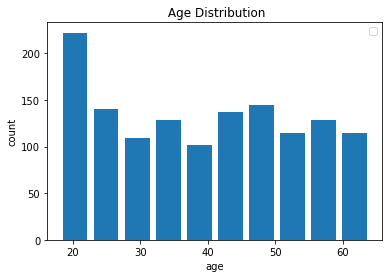

In [162]:
plt.hist(df["age"], histtype='bar', rwidth=0.8)

plt.xlabel('age')
plt.ylabel('count')
plt.title(' Age Distribution')
plt.legend()
plt.show()

**Isolate all the continuous and discrete columns into their respective lists named
‘numerical_continuous’ and ‘numerical_discrete’ respectively.**

In [170]:
# make a list of the numerical variables first
numerical = [var for var in df.columns if df[var].dtype!='O']

In [171]:
#  visualise the values of the discrete variables
discrete = []

for var in numerical:
    if len(df[var].unique())<20:
        print(var, ' values: ', df[var].unique())
        discrete.append(var)
print()
print('There are {} discrete variables'.format(len(discrete)))

children  values:  [0 1 3 2 5 4]

There are 1 discrete variables


In [172]:
#  skip the  target variable Charges, which is also numerical

numerical = [var for var in numerical if var not in discrete and var not in ['charges']]
print('There are {} numerical and continuous variables'.format(len(numerical)))

There are 2 numerical and continuous variables


**Visually identify if there is presence of any outliers in the numerical_continuous columns
and resolve them using a zscore test and a threshold of your choosing**

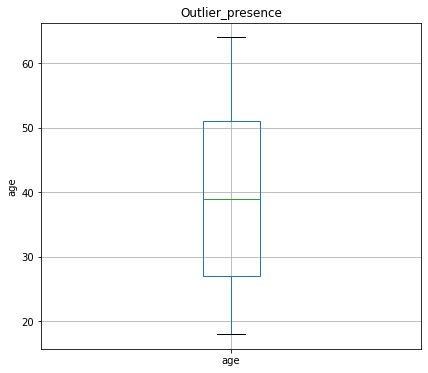

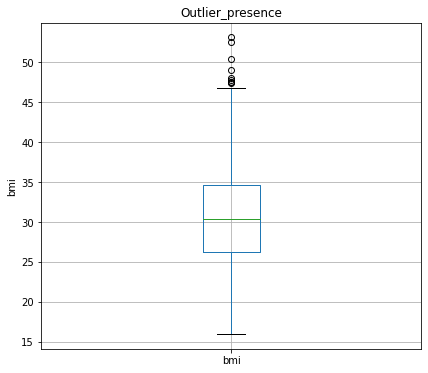

In [173]:
# using boxplot to find outliers presence in numerical_continuous column

for var in numerical:
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    fig = df.boxplot(column=var)
    fig.set_title('Outlier_presence')
    fig.set_ylabel(var)

In [178]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score


def tree_binariser(var):
    score_ls = [] # here I will store the mse

    for tree_depth in [1,2,3,4]:
        # call the model
        tree_cfl = DecisionTreeRegressor(max_depth=tree_depth)

        # train the model using 3 fold cross validation
        scores = cross_val_score(tree_cfl, x_train[var].to_frame(), y_train, cv=3, scoring='neg_mean_squared_error')
        score_ls.append(np.mean(scores))

    # find depth with smallest mse
    depth = [1,2,3,4][np.argmin(score_ls)]
    #print(score_ls, np.argmin(score_ls), depth)

    # transform the variable using the tree
    tree_cfl = DecisionTreeRegressor(max_depth=depth)
    tree_cfl.fit(x_train[var].to_frame(), x_train.charges)
    x_train[var] = tree_cfl.predict(x_train[var].to_frame())
    x_test[var] = tree_cfl.predict(x_test[var].to_frame())
    test[var] =  tree_cfl.predict(test[var].to_frame())

In [175]:
for var in numerical:
    tree_binariser(var)

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices